In [34]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

%matplotlib inline 
%load_ext autoreload
%autoreload 2

from data_loader import read_test_data_properties, read_train_data_properties, load_train_data, load_test_data, get_train_labels
from train import train
from inference import inference
from postprocess import get_rle_encoding, get_labels

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
CW_DIR = os.getcwd()
TRAIN_DIRS = [os.path.join(CW_DIR, 'data', 'stage1_train')]
TEST_DIR = os.path.join(CW_DIR, 'data', 'stage1_test')
IMG_DIR_NAME = 'images'
MASK_DIR_NAME = 'masks'

# Read data

In [3]:
train_df = read_train_data_properties(TRAIN_DIRS, IMG_DIR_NAME, MASK_DIR_NAME)
test_df = read_test_data_properties(TEST_DIR, IMG_DIR_NAME)

In [4]:
x_train, y_train, contour_train, no_contour_train = load_train_data(train_df)
y_train_full = np.array([np.concatenate((x, y, z), axis=2) for x, y, z in zip(y_train, contour_train, no_contour_train)])
labels_train = get_train_labels(train_df)

  0%|          | 1/670 [00:00<01:13,  9.11it/s]

Loading train images and masks ...


100%|██████████| 670/670 [00:37<00:00, 18.10it/s]


In [5]:
x_test = load_test_data(test_df)

 26%|██▌       | 17/65 [00:00<00:00, 149.88it/s]

Loading test images ...


100%|██████████| 65/65 [00:00<00:00, 189.02it/s]


# Train

In [25]:
model_paths = train(x_train, y_train_full, labels_train, epoch=26)

Epoch 1/26
16/16 [==============================] - 42s 3s/step - loss: 1.2952 - dice_coef: 0.6650 - val_loss: 1.4809 - val_dice_coef: 0.5943
Epoch 2/26
16/16 [==============================] - 36s 2s/step - loss: 1.2204 - dice_coef: 0.6862 - val_loss: 1.3676 - val_dice_coef: 0.6311
Epoch 3/26
16/16 [==============================] - 35s 2s/step - loss: 1.1923 - dice_coef: 0.6940 - val_loss: 1.2910 - val_dice_coef: 0.6630
Epoch 4/26
16/16 [==============================] - 36s 2s/step - loss: 1.1739 - dice_coef: 0.6976 - val_loss: 1.3078 - val_dice_coef: 0.6525
Epoch 5/26
16/16 [==============================] - 36s 2s/step - loss: 1.1498 - dice_coef: 0.7035 - val_loss: 1.6590 - val_dice_coef: 0.5620
Epoch 6/26
16/16 [==============================] - 36s 2s/step - loss: 1.1233 - dice_coef: 0.7106 - val_loss: 1.4614 - val_dice_coef: 0.6013
Epoch 7/26
16/16 [==============================] - 36s 2s/step - loss: 1.1542 - dice_coef: 0.7083 - val_loss: 1.1570 - val_dice_coef: 0.7078
Epoch 

100%|██████████| 134/134 [00:12<00:00, 10.39it/s]



epoch24: Target loss: 0.5252463135253883

New maximum of target score! Saving model
Epoch 26/26
 5/16 [========>.....................] - ETA: 21s - loss: 0.9432 - dice_coef: 0.7950

KeyboardInterrupt: 

In [26]:
#model_paths = ["models/fold0.h5"]

# Infr

In [27]:
y_prediction = inference(x_test, model_paths)

100%|██████████| 65/65 [00:40<00:00,  1.61it/s]


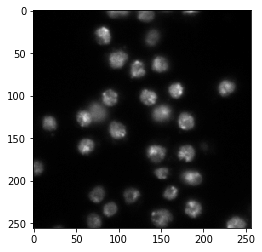

In [43]:
plt.imshow(x_test[8])

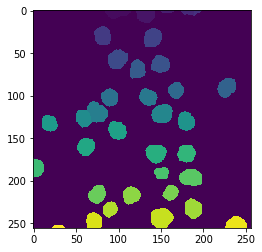

In [44]:
plt.imshow(get_labels(y_prediction[8][:,:,0], y_prediction[8][:,:,2]))

In [45]:
y_test_rle, y_test_ids = get_rle_encoding(test_df, y_prediction)

65it [00:09,  7.00it/s]


In [46]:
sub = pd.DataFrame()
sub['ImageId'] = y_test_ids
sub['EncodedPixels'] = pd.Series(y_test_rle).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('sub-dsbowl2018.csv', index=False)
sub.head()


,ImageId,EncodedPixels
0,38f5cfb55fc8b048e82a5c895b25fefae7a70c71ab9990...,4 18 261 17 518 15 775 14 1032 12 1289 10 1547 7
1,38f5cfb55fc8b048e82a5c895b25fefae7a70c71ab9990...,48669 5 48924 7 49179 9 49435 9 49691 10 49947...
2,38f5cfb55fc8b048e82a5c895b25fefae7a70c71ab9990...,23333 5 23587 8 23843 9 24098 11 24353 12 2460...
3,38f5cfb55fc8b048e82a5c895b25fefae7a70c71ab9990...,47926 4 48180 8 48436 8 48691 10 48947 10 4920...
4,38f5cfb55fc8b048e82a5c895b25fefae7a70c71ab9990...,25687 4 25942 7 26197 9 26453 10 26708 11 2696...
